In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

In [2]:
dataset=pd.read_csv('../python-ml-course/datasets/bank/bank.csv',sep=';')
dataset.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


## Analisis de Datos

In [3]:
dataset['education'].unique().tolist()

['basic.9y',
 'high.school',
 'university.degree',
 'professional.course',
 'basic.6y',
 'basic.4y',
 'unknown',
 'illiterate']

In [4]:
dataset['education']=np.where((dataset['education']=='basic.4y') |
                              (dataset['education']=='basic.6y') |
                              (dataset['education']=='basic.9y'),'Basic',dataset['education'])
dataset['education'].unique().tolist()

['Basic',
 'high.school',
 'university.degree',
 'professional.course',
 'unknown',
 'illiterate']

In [5]:
dataset['y']=(dataset['y']=='yes').astype(int)
dataset['y'].value_counts()

0    3668
1     451
Name: y, dtype: int64

In [6]:
dataset.groupby('y').mean()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
y,,,,,,,,,,
0,39.895311,219.40976,2.605780,982.763086,0.141767,0.240185,93.599677,-40.586723,3.802826,5175.502072
1,41.889135,560.78714,1.980044,778.722838,0.585366,-1.177384,93.417268,-39.786475,2.145448,5093.118625


In [7]:
education_y=pd.crosstab(dataset['education'],dataset['y'])

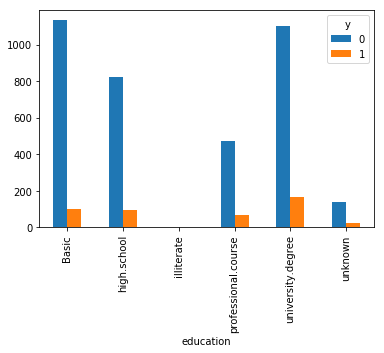

In [8]:
education_y.plot(kind='bar')

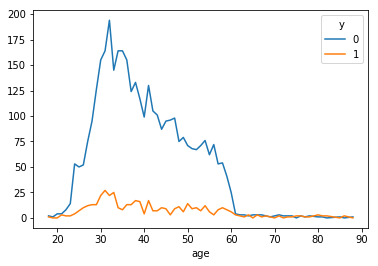

In [9]:
pd.crosstab(dataset['age'],dataset['y']).plot()

## Modelamiento de datos

### Crear dummies de columnas categoricas

In [10]:
categoricas=['education','job','marital','housing','loan','contact','month','default','day_of_week','poutcome']

for catego in categoricas:
    dummy=pd.get_dummies(dataset[catego],prefix=catego)
    dataset=dataset.join(dummy)
    dataset=dataset.drop(catego,axis=1)

In [11]:
dataset.columns.values

array(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y',
       'education_Basic', 'education_high.school', 'education_illiterate',
       'education_professional.course', 'education_university.degree',
       'education_unknown', 'job_admin.', 'job_blue-collar',
       'job_entrepreneur', 'job_housemaid', 'job_management',
       'job_retired', 'job_self-employed', 'job_services', 'job_student',
       'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'housing_no', 'housing_unknown', 'housing_yes',
       'loan_no', 'loan_unknown', 'loan_yes', 'contact_cellular',
       'contact_telephone', 'month_apr', 'month_aug', 'month_dec',
       'month_jul', 'month_jun', 'month_mar', 'month_may', 'month_nov',
       'month_oct', 'month_sep', 'default_no', 'default_unknown',
       'default_yes', 'day_of_week_fri',

In [12]:
y=dataset['y']
x=dataset.drop('y',axis=1)

### Escoger el mejor modelo

In [13]:
from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [14]:
lr=LogisticRegression()
rfe=RFE(lr,12)
rfe.fit(x,y)
rfe.support_

array([False, False, False, False,  True, False, False, False,  True,
       False, False, False, False, False, False, False, False, False,
        True, False, False, False,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True,  True,  True,
        True,  True, False,  True, False, False, False, False, False,
       False, False, False, False,  True, False,  True])

In [15]:
z=zip(x,rfe.support_)
list(z)

[('age', False),
 ('duration', False),
 ('campaign', False),
 ('pdays', False),
 ('previous', True),
 ('emp.var.rate', False),
 ('cons.price.idx', False),
 ('cons.conf.idx', False),
 ('euribor3m', True),
 ('nr.employed', False),
 ('education_Basic', False),
 ('education_high.school', False),
 ('education_illiterate', False),
 ('education_professional.course', False),
 ('education_university.degree', False),
 ('education_unknown', False),
 ('job_admin.', False),
 ('job_blue-collar', False),
 ('job_entrepreneur', True),
 ('job_housemaid', False),
 ('job_management', False),
 ('job_retired', False),
 ('job_self-employed', True),
 ('job_services', False),
 ('job_student', False),
 ('job_technician', False),
 ('job_unemployed', False),
 ('job_unknown', False),
 ('marital_divorced', False),
 ('marital_married', False),
 ('marital_single', False),
 ('marital_unknown', False),
 ('housing_no', False),
 ('housing_unknown', False),
 ('housing_yes', False),
 ('loan_no', False),
 ('loan_unknown', F

In [16]:
new_x=dataset[['previous','euribor3m','job_entrepreneur','job_self-employed','month_dec','month_jul','month_jun','month_mar','month_may','month_oct','poutcome_failure','poutcome_success']]

### Implementacion del Modelo con statsmodel.api

In [17]:
import statsmodels.api as sma

In [18]:
logisticmodel=sma.Logit(y,new_x)
result=logisticmodel.fit()
result.summary2()

Optimization terminated successfully.
         Current function value: 0.279180
         Iterations 7


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            Pseudo R-squared: 0.192      
Dependent Variable: y                AIC:              2323.8813  
Date:               2019-01-04 09:41 BIC:              2399.7617  
No. Observations:   4119             Log-Likelihood:   -1149.9    
Df Model:           11               LL-Null:          -1422.9    
Df Residuals:       4107             LLR p-value:      4.9751e-110
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     7.0000                                        
------------------------------------------------------------------
                   Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
------------------------------------------------------------------
previous           0.3493   0.1411   2.4750 0.0133  0.0727  0.6258
euribor3m         -0.6253   0.0265 -23.6151 0.0000 -0.6772 -0.5734
job_entrepreneur  -0.4842   0.3817  -1.2685 0.2046 -1.2323  0.2639
job_self-employed -0.4626   0.3275  -1.4125 0.1578 -1.1046  0.1793
month_dec          0.7147   0.4662   1.5331 0.1253 -0.1990  1.6284
month_jul          0.3280   0.1842   1.7808 0.0750 -0.0330  0.6889
month_jun          0.3431   0.1689   2.0310 0.0423  0.0120  0.6741
month_mar          1.0612   0.3152   3.3666 0.0008  0.4434  1.6789
month_may         -1.0490   0.1264  -8.3016 0.0000 -1.2967 -0.8014
month_oct          0.0707   0.2699   0.2621 0.7932 -0.4583  0.5997
poutcome_failure  -1.0450   0.2453  -4.2601 0.0000 -1.5257 -0.5642
poutcome_success   0.7788   0.2888   2.6967 0.0070  0.2128  1.3449
==================================================================

"""

### Implementacion del Modelo con sklearn

In [19]:
from sklearn import linear_model

In [20]:
logisticmodel2=linear_model.LogisticRegression()
logisticmodel2.fit(new_x,y)
logisticmodel2.score(new_x,y) #r2 , los valores que se le pasan son los de testing

0.9021607186210245

In [21]:
coeficientes=pd.DataFrame(list(zip(new_x,np.transpose(logisticmodel2.coef_))))
coeficientes

,0,1
0,previous,[0.3798316142096139]
1,euribor3m,[-0.5027490712653142]
2,job_entrepreneur,[-0.34306615561163367]
3,job_self-employed,[-0.33506416426093977]
4,month_dec,[0.8733167999349573]
5,month_jul,[0.3820874456812563]
6,month_jun,[0.5096949858004949]
7,month_mar,[1.270361228864782]
8,month_may,[-0.7430896290668391]
9,month_oct,[0.41185574423171945]


### Predicción de Modelo

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
x_train, x_test, y_train,y_test=train_test_split(new_x,y,test_size=.3,random_state=0)
logisticmodel2.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [24]:
prediccion=logisticmodel2.predict(x_test) #Predice si o no, de acuerdo al threshold= .5 (default)
prediccion

array([0, 0, 0, ..., 0, 0, 1])

In [25]:
prediccion2=logisticmodel2.predict_proba(x_test) #predice el valor numerico de "y" (segundo valor)
prediccion2

array([[0.93352157, 0.06647843],
       [0.88259365, 0.11740635],
       [0.93040666, 0.06959334],
       ...,
       [0.73273217, 0.26726783],
       [0.97862459, 0.02137541],
       [0.24746608, 0.75253392]])

### Evaluación del modelo (validacion con metrics)

In [26]:
from sklearn import metrics

metrics.accuracy_score(prediccion,y_test) #precision de los valores calculados (0 o 1) contra los valores de "y_test"
#valores predichos vs y_test

0.9021035598705501

### Evaluación del modelo (validacion cruzada)

In [28]:
from sklearn.model_selection import cross_val_score

scores=cross_val_score(logisticmodel2,new_x,y,scoring='accuracy',cv=8)#cv=es el numero de divisiones,kfolds o iteraaciones que queremos
scores.mean()

0.9023976399212946

### Curva ROC

In [ ]:
from ggplot import *  #Crear envirroment de py 3.4

In [ ]:
predicciones=pd.DataFrame(prediccion2[:,1]) #obtener solo los puros valores

especidad,sensiblidad,_=metrics.roc_curve(y_test,predicciones)

df_roc=pd.DataFrame({
    'x':especidad,
    'y':sensiblidad
})

area_under_roc=metrics.auc(especidad,sensiblidad)
area_under_roc

In [ ]:
ggplot(df_roc,aes(x='x',y='y'))+geom_line()+geom_abline(line_type='dashed')

### Threshold Custom

In [ ]:
predicciones=pd.DataFrame(prediccion2[:,1])
threshold=.1
predicciones['Prestamo']=np.where(predicciones[0]>threshold,1,0)
predicciones.head()

In [ ]:
pd.crosstab(predicciones.Prestamo,columns="Total")